# Aprendizaje automático I

## Proceso de ETL

## Carga y fusión de datos

In [13]:
from py.load import merge_data
import pandas as pd

# Ejecutar la función
merge_data('data/original/bookings_train.csv', 'data/original/hotels.csv', 'data/process/data.csv')
# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('data/process/data.csv')
# Veo las dimensiones del DataFrame
df.shape

Datos cargados y guardados en: data/process/data.csv


(50741, 22)

## División de datos

In [14]:
from py.split import split_train_validation

# Ejecutar la función para dividir los datos
df_train, df_validation = split_train_validation(df, '2017-06-30', 'data/process/data_validation.csv')

# Veo las dimensiones de los DataFrames
df_train.shape, df_validation.shape

El DataFrame df_validation se ha guardado en 'data/process/data_validation.csv'.
Se han creado los DataFrames df_train y df_validation.


((46602, 22), (1407, 22))

## Preprocesamiento de datos

In [15]:
from py.preprocess import preprocess_data

# Preprocesamiento inicial (división train/test, manejo de nulos/outliers, etc.)
X_train, X_test, y_train, y_test = preprocess_data(df_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25807, 17), (11061, 17), (25807,), (11061,))

In [16]:
X_train.columns

Index(['board', 'market_segment', 'distribution_channel', 'room_type',
       'required_car_parking_spaces', 'special_requests', 'stay_nights',
       'rate', 'total_guests', 'hotel_type', 'country', 'parking',
       'total_rooms', 'restaurant', 'pool_and_spa', 'avg_review',
       'advance_reservation_days'],
      dtype='object')

## Procesamiento de datos

In [17]:
from py.process import process_data

# Definir las columnas numéricas y categóricas para el procesamiento
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Procesamiento (normalización y codificación one-hot)
X_train_processed, X_test_processed = process_data(X_train, X_test, numerical_cols, categorical_cols)

# Guardar los DataFrames procesados (opcional)
X_train_processed.to_csv('data/X_train_procesado.csv', index=False)
X_test_processed.to_csv('data/X_test_procesado.csv', index=False)

In [18]:
# Cargo el csv con los datos procesados
X_test_processed = pd.read_csv('data/X_test_procesado.csv')
X_test_processed.shape

(11061, 42)

In [19]:
#Cargo el csv con los datos procesados
X_train_processed = pd.read_csv('data/X_train_procesado.csv')
X_train_processed.shape

(25807, 42)

In [20]:
X_train_processed.columns

Index(['required_car_parking_spaces', 'special_requests', 'stay_nights',
       'rate', 'total_guests', 'parking', 'total_rooms', 'restaurant',
       'pool_and_spa', 'avg_review', 'advance_reservation_days', 'board_BB',
       'board_FB', 'board_HB', 'board_SC', 'board_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'room_type_A', 'room_type_B', 'room_type_C', 'room_type_D',
       'room_type_E', 'room_type_F', 'room_type_G', 'room_type_H',
       'room_type_L', 'hotel_type_City Hotel', 'hotel_type_Resort Hotel',
       'country_FRA', 'country_POR', 'country_SPA'],
      dtype='object')

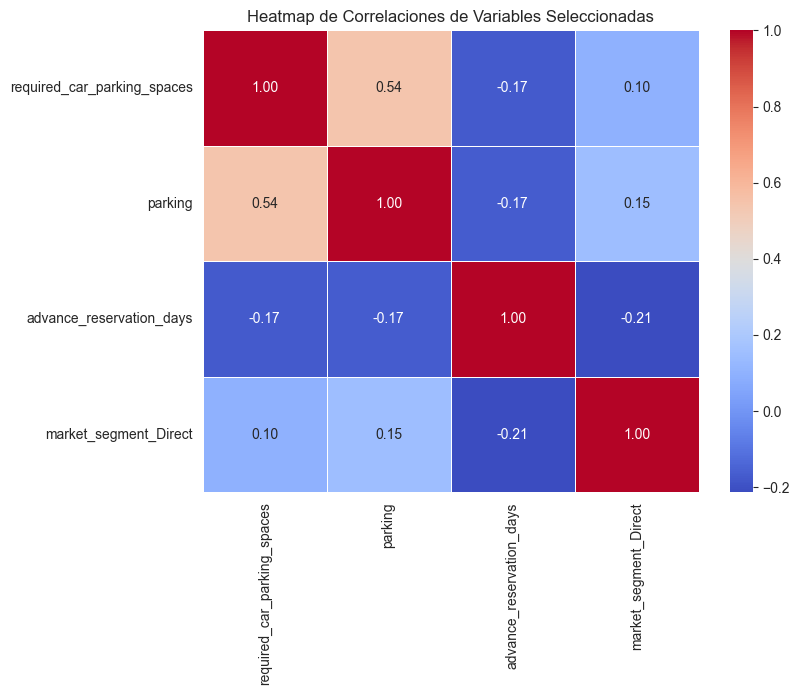

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_of_interest = ['required_car_parking_spaces', 'parking', 'advance_reservation_days', 'market_segment_Direct']
subset_df = X_train_processed[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlaciones de Variables Seleccionadas')
plt.show()

# Modelo Predictivo

## Liblinear

In [12]:
from py.liblinear import find_best_logistic_params_and_k_grid

# Encontrar los mejores hiperparámetros y k para LogisticRegression
find_best_logistic_params_and_k_grid(X_train_processed, y_train, X_test_processed, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1
[CV 1/5; 1/72] END model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1;, score=0.701 total time=   0.0s
[CV 2/5; 1/72] START model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1
[CV 2/5; 1/72] END model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1;, score=0.701 total time=   0.0s
[CV 3/5; 1/72] START model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1
[CV 3/5; 1/72] END model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1;, score=0.702 total time=   0.0s
[CV 4/5; 1/72] START model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1
[CV 4/5; 1/72] END model__C=0.01, model__max_iter=1000, model__penalty=l1, selector__k=1;, score=0.704 total time=   0.0s
[CV 5/5; 1/72] START model__C=0.01, model__max_iter=1000, model__penalty=l1, selector_

## SGDClassifier

In [43]:
from py.sgdclassifier import find_best_sgdclassifier_params_and_k_grid

find_best_sgdclassifier_params_and_k_grid(X_train_processed, y_train, X_test_processed, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros: {'model__alpha': 0.001, 'model__eta0': 0.01, 'model__learning_rate': 'adaptive', 'model__max_iter': 1000, 'model__penalty': 'l1', 'selector__k': 4}
Mejor score (F1): 0.7255599948346223

Mejores características seleccionadas:
Index(['required_car_parking_spaces', 'parking', 'advance_reservation_days',
       'market_segment_Direct'],
      dtype='object')

Métricas de rendimiento en el conjunto de prueba:
Accuracy: 0.5714673176023868
Precision: 0.25282129021391275
Recall: 0.8315789473684211
F1-score: 0.3877551020408163
ROC AUC: 0.6521012947804166

Validación cruzada (F1): [0.71911005 0.73018718 0.72050184 0.72934815 0.72865275]
Media de validación cruzada (F1): 0.7255599948346223
